# CBIS-DDSM Breast Cancer Mammography Dataset

## 📖 Description
This dataset is the **Curated Breast Imaging Subset of DDSM (CBIS-DDSM)**, an updated and standardized version of the original **Digital Database for Screening Mammography (DDSM)**.  
This Kaggle release provides **JPEG images** while preserving the **original resolution**.

- **Studies** : 6,775  
- **Series** : 6,775  
- **Participants** : 1,566 *(Note: multiple patient IDs per participant)*  
- **Images** : 10,239  
- **Modality** : MG (Mammography)  
- **Image Size** : ~ 6 GB (.jpg)

> **Note**: The dataset structure means one participant may have multiple patient IDs.  
> Example: `00038` has several IDs (`Calc-Test_P_00038_LEFT_CC`, `Calc-Test_P_00038_RIGHT_CC_1`, etc.).  
> This makes it appear as ~6,671 “patients” in the DICOM metadata, but the true number of unique participants is **1,566**.

---

## 🎯 Background & Motivation
CBIS-DDSM was curated by trained mammographers from the original **DDSM (2,620 scanned film mammography studies)**. It provides:

- Decompressed and converted **DICOM** images.  
- **Updated ROI segmentations and bounding boxes** with pathology for training.  
- A **standardized and reproducible format** for CADx (diagnosis) and CADe (detection) research.  

Historically, reproducibility on DDSM was challenging because:  
- Early compute limitations made large-scale use impractical.  
- Images were stored in **non-standard compressed formats** requiring outdated tools.  
- Original ROI annotations were **coarse** rather than precise.  

CBIS-DDSM solves these issues by releasing a **curated, standardized dataset** with high-quality annotations to support consistent evaluation and replication.

---

## 🩻 Mammography (MG) at a Glance
- **Purpose**: Low-dose X-ray imaging for breast cancer screening; detects microcalcifications and masses for **early cancer detection**.  
- **Procedure**: The breast is briefly compressed to obtain clearer images; mild short-lived discomfort may occur.  

**Standard Views**:  
1. **CC (Craniocaudal)** – top-down view of the whole breast.  
2. **MLO (Mediolateral Oblique, ~30–60°)** – oblique view covering the most tissue, including the axillary tail.

---

## 📌 Key Facts (Summary Table)

| Item            | Value       |
|-----------------|-------------|
| Studies         | 6,775       |
| Series          | 6,775       |
| Participants    | 1,566       |
| Images          | 10,239      |
| Modality        | Mammography |
| File Size       | ~ 6 GB (.jpg)|

---

## 📚 Citations & Data Usage Policy

Users of this dataset must abide by the **TCIA Data Usage Policy** and the  
**Creative Commons Attribution 3.0 Unported License** under which it has been published.  

Attribution should include references to the following works:

- **CBIS-DDSM Dataset Citation**  
  Lee, R. S., Gimenez, F., Hoogi, A., & Rubin, D. L. (2016).  
  *Curated Breast Imaging Subset of DDSM [Dataset]*. The Cancer Imaging Archive.  
  DOI: [10.7937/K9/TCIA.2016.7O02S9CY](https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY)

- **Publication Citation**  
  Lee, R. S., Gimenez, F., Hoogi, A., Miyake, K. K., Gorovoy, M., & Rubin, D. L. (2017).  
  *A curated mammography data set for use in computer-aided detection and diagnosis research*.  
  *Scientific Data, 4*(1), 1–9.  
  DOI: [10.1038/sdata.2017.177](https://doi.org/10.1038/sdata.2017.177)

- **TCIA Citation**  
  Clark, K., Vendt, B., Smith, K., Freymann, J., Kirby, J., Koppel, P., Moore, S., Phillips, S.,  
  Maffitt, D., Pringle, M., Tarbox, L., & Prior, F. (2013).  
  *The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository*.  
  *Journal of Digital Imaging, 26*(6), 1045–1057.  
  DOI: [10.1007/s10278-013-9622-7](https://doi.org/10.1007/s10278-013-9622-7)

- **Kaggle Dataset Citation**  
  awsaf49 (2021).  
  *CBIS-DDSM Breast Cancer Image Dataset* [Kaggle dataset].  
  Available at: [https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset](https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset)

---



## Exploratory Data Analysis (EDA)

In [1]:
import kagglehub

path = kagglehub.dataset_download("awsaf49/cbis-ddsm-breast-cancer-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import re, os

DATA_ROOT = Path("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset")
CSV_DIR   = DATA_ROOT / "csv"
IMG_ROOT  = DATA_ROOT / "jpeg"

WORK = Path("/kaggle/working/cbis_work")
WORK.mkdir(parents = True, exist_ok = True)

print("CSV DIR:", CSV_DIR)
print("IMG ROOT:", IMG_ROOT)
print("WORK DIR:", WORK)

for fname in ["mass_case_description_train_set.csv",
              "mass_case_description_test_set.csv",
              "calc_case_description_train_set.csv",
              "calc_case_description_test_set.csv"]:
    df = pd.read_csv(CSV_DIR / fname)
    print(f"{fname:>35}  rows = {len(df)}")

dicom_head = pd.read_csv(CSV_DIR/"dicom_info.csv", nrows=3)
meta_head  = pd.read_csv(CSV_DIR/"meta.csv", nrows=3)
print("\ndicom_info.csv columns:", list(dicom_head.columns))
print("meta.csv columns:", list(meta_head.columns))


CSV DIR: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv
IMG ROOT: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg
WORK DIR: /kaggle/working/cbis_work
mass_case_description_train_set.csv  rows = 1318
 mass_case_description_test_set.csv  rows = 378
calc_case_description_train_set.csv  rows = 1546
 calc_case_description_test_set.csv  rows = 326

dicom_info.csv columns: ['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber', 'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex', 'PhotometricInterpretation', 'PixelRepresentation', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer', 'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SmallestI

In [3]:
files = [
    'mass_case_description_train_set.csv',
    'mass_case_description_test_set.csv',
    'calc_case_description_train_set.csv',
    'calc_case_description_test_set.csv',
]
records = []
for fname in files:
    df = pd.read_csv(CSV_DIR / fname)
    subset = fname.replace('.csv','')
    total = len(df)
    group = df.groupby(['pathology','image view']).size().unstack(fill_value = 0)
    for pathology in group.index:
        cc = group.loc[pathology].get('CC',0)
        mlo = group.loc[pathology].get('MLO',0)
        records.append({
            'subset': subset,
            'pathology': pathology,
            'CC': cc,
            'MLO': mlo,
            'total': cc + mlo
        })

stats = pd.DataFrame(records)

benign_mask = stats['pathology'].isin(['BENIGN','BENIGN_WITHOUT_CALLBACK'])
summary = stats.copy()
summary.loc[benign_mask,'label'] = 'Benign'
summary.loc[~benign_mask,'label'] = 'Malignant'

binary = summary.groupby(['subset','label'])[['CC','MLO','total']].sum().reset_index()

print("pathology and image view count：")
print(stats.pivot(index = ['subset','pathology'], columns = [], values = ['CC','MLO','total']))
print("\nBenign vs Malignant：")
print(binary)

pathology and image view count：
                                                          CC  MLO  total
subset                          pathology                               
mass_case_description_train_set BENIGN                   273  304    577
                                BENIGN_WITHOUT_CALLBACK   38   66    104
                                MALIGNANT                296  341    637
mass_case_description_test_set  BENIGN                    94  100    194
                                BENIGN_WITHOUT_CALLBACK   16   21     37
                                MALIGNANT                 67   80    147
calc_case_description_train_set BENIGN                   251  277    528
                                BENIGN_WITHOUT_CALLBACK  230  244    474
                                MALIGNANT                258  286    544
calc_case_description_test_set  BENIGN                    57   73    130
                                BENIGN_WITHOUT_CALLBACK   32   35     67
                   

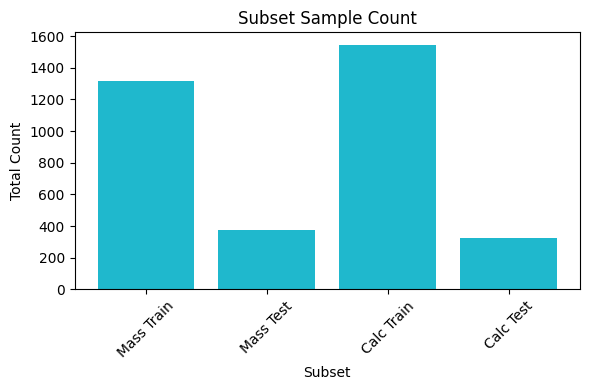

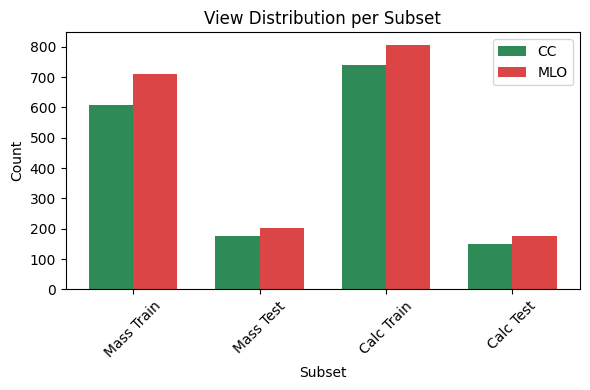

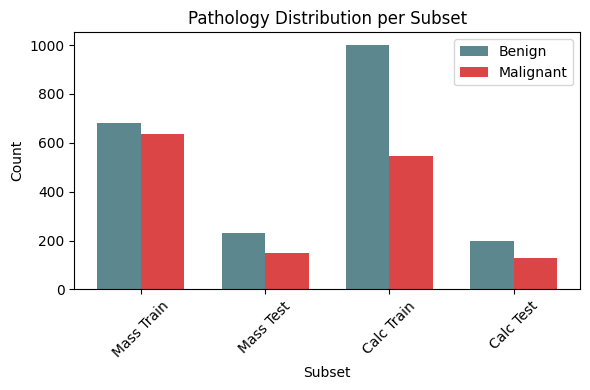

In [4]:
import matplotlib.pyplot as plt

DATA = [
    {"subset": "Mass Train", "total": 1318, "CC": 607, "MLO": 711, "Benign": 681, "Malignant": 637},
    {"subset": "Mass Test",  "total": 378,  "CC": 177, "MLO": 201, "Benign": 231, "Malignant": 147},
    {"subset": "Calc Train","total": 1546, "CC": 739, "MLO": 807, "Benign": 1002,"Malignant": 544},
    {"subset": "Calc Test", "total": 326,  "CC": 149, "MLO": 177, "Benign": 197, "Malignant": 129},
]
df = pd.DataFrame(DATA)
output_dir = Path('/kaggle/working')
output_dir.mkdir(exist_ok=True, parents=True)

plt.figure(figsize=(6,4))
plt.bar(df['subset'], df['total'], color='#1FB8CD')
plt.title('Subset Sample Count')
plt.xlabel('Subset')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_dir/'subset_sample_count_matplotlib.png')
plt.show()

x = range(len(df))
width = 0.35
plt.figure(figsize=(6,4))
plt.bar(x, df['CC'], width, label='CC', color='#2E8B57')
plt.bar([i+width for i in x], df['MLO'], width, label='MLO', color='#DB4545')
plt.title('View Distribution per Subset')
plt.xlabel('Subset')
plt.ylabel('Count')
plt.xticks([i+width/2 for i in x], df['subset'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(output_dir/'view_distribution_matplotlib.png')
plt.show()

plt.figure(figsize=(6,4))
plt.bar(x, df['Benign'], width, label='Benign', color='#5D878F')
plt.bar([i+width for i in x], df['Malignant'], width, label='Malignant', color='#DB4545')
plt.title('Pathology Distribution per Subset')
plt.xlabel('Subset')
plt.ylabel('Count')
plt.xticks([i+width/2 for i in x], df['subset'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(output_dir/'pathology_distribution_matplotlib.png')
plt.show()

In [7]:
dicom_df = pd.read_csv(CSV_DIR / "dicom_info.csv")

print("=== dicom_info.csv ===")
display(dicom_df.head().astype(str))

print("\n=== list ===")
print(list(dicom_df.columns))

=== dicom_info.csv ===


,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,nan,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,nan,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,nan,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,nan,16,16,BREAST,97,20160503,115347.77,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,nan,8,8,Left Breast,3104,20160503,115347.77,WSD,...,MATLAB,nan,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,nan,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,nan



=== list ===
['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber', 'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex', 'PhotometricInterpretation', 'PixelRepresentation', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer', 'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue', 'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID', 'StudyTime']


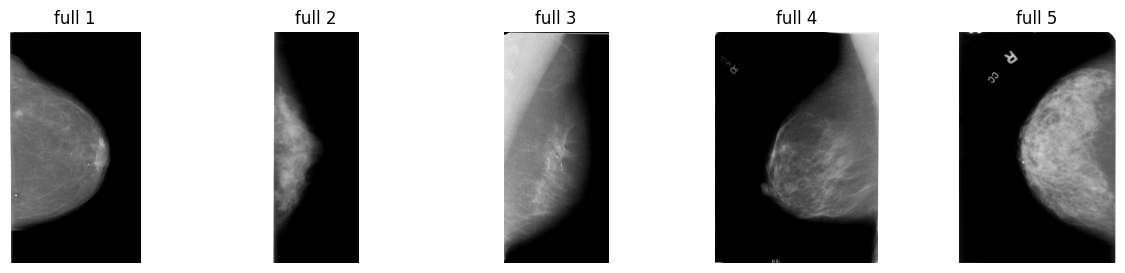

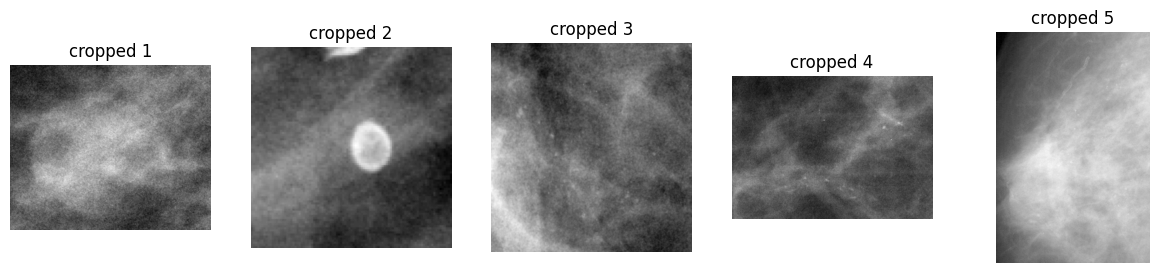

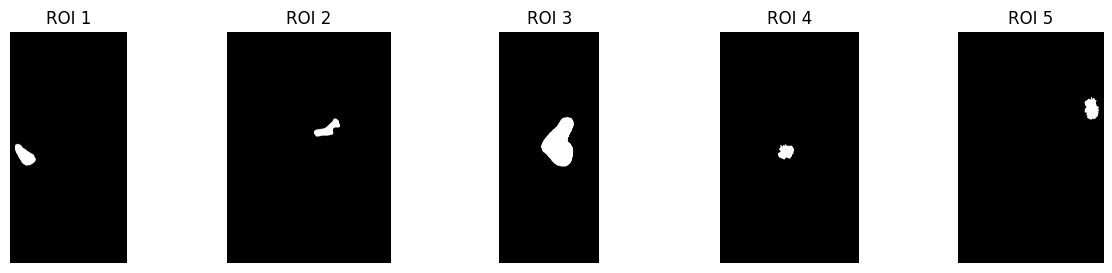

In [10]:
from PIL import Image

image_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

def show_samples(series_desc, n = 5):
    paths = dicom_df[dicom_df.SeriesDescription == series_desc]['image_path']
    paths = paths.str.replace('CBIS-DDSM/jpeg', image_dir, regex = False).tolist()[:n]
    plt.figure(figsize = (3*n, 3))
    for i, p in enumerate(paths, 1):
        img = Image.open(p).convert('L')
        ax = plt.subplot(1, n, i)
        ax.imshow(img, cmap = 'gray')
        ax.axis('off')
        ax.set_title(series_desc.split()[0] + f" {i}")
    plt.show()

show_samples('full mammogram images', n = 5)
show_samples('cropped images', n = 5)
show_samples('ROI mask images', n = 5)

## Exploratory Data Analysis (EDA)

**Goal.** Understand subset sizes (Mass/Calc × Train/Test), view distribution (CC vs MLO), class balance (Benign vs Malignant), and visually inspect the three image types (full, cropped, ROI mask).

### 1) Subset Sample Count
![](subset_sample_count_matplotlib.png)

- **Mass-Train = 1,318**, **Mass-Test = 378**  
- **Calc-Train = 1,546**, **Calc-Test = 326**  
→ Calc has more training samples than Mass; overall training size is reasonable.

### 2) View Distribution per Subset
![](view_distribution_matplotlib.png)

- **MLO** views are slightly more frequent than **CC** across subsets.  
- Since CC/MLO present tissue differently, we will (a) include view-aware augmentation or sampling, and/or (b) optionally encode the view as a feature.

### 3) Pathology Distribution per Subset
![](pathology_distribution_matplotlib.png)

- **Mass-Train**: Benign 681 vs Malignant 637 (near-balanced)  
- **Mass-Test**: Benign 231 vs Malignant 147 (benign-skewed)  
- **Calc-Train**: Benign 1002 vs Malignant 544 (**imbalanced**)  
- **Calc-Test**: Benign 197 vs Malignant 129 (benign-skewed)  
→ Class imbalance is **notable for Calc**, so we will handle it during training.

### 4) Sample Visualization
- **Full mammogram images**: whole-breast views; rich but noisy background.  
- **Cropped images**: lesion-centered crops; more focused for classification.  
- **ROI mask images**: lesion segmentation masks; can support  
  - segmentation (or weakly supervised attention), and  
  - classification pre-processing (mask-in lesion or mask-out background).

> **Patient identity note.** One participant can map to multiple patient IDs / studies / views. To prevent **patient leakage**, splits should be patient-wise.

---

### Key Takeaways & Risks
- **Class imbalance** (especially in Calc-Train).  
- **View bias** (MLO > CC).  
- **Multi-type inputs** (full/cropped/mask) require a coherent strategy.

### Mitigation Plan
- **Imbalance handling**: `class_weight`, `WeightedRandomSampler`, or **Focal Loss**.  
- **Threshold calibration**: report not only AUC but also **ACC/SEN/SPE at BestTH**.  
- **Preprocessing**:  
  - Full: breast-region cropping or background suppression, contrast normalization.  
  - Cropped: local texture augmentations (contrast/translation/affine).  
  - Mask: optional mask-guided attention for classification.

## Data Cleaning and Label Alignment

Before training, we need to clean and align the metadata with the actual image files.  
Key processing steps:

1. **Field normalization & path fixing**  
   - Standardize heterogeneous CSV fields (`cropped image file path`, `ROI mask file path`, etc.).  
   - Replace placeholder paths with valid Kaggle input paths.

2. **UID and Series matching**  
   - Extract UIDs from paths and map `SOPInstanceUID` ↔ `SeriesInstanceUID`.  
   - Apply a 3-step resolver (direct → SOP → study-level fallback) for robust matching.  

3. **Label consolidation**  
   - Merge `BENIGN` and `BENIGN_WITHOUT_CALLBACK` into **Benign (0)**.  
   - Map `MALIGNANT` to **Malignant (1)**.  

4. **Label propagation to full images**  
   - Transfer labels from crop/mask to corresponding full mammograms using **Patient + Side + View** keys.  

5. **Final master dataset**  
   - Consolidate full, crop, and mask into a single table with fields:  
     `image_path, series_uid, study_uid, patient_id, kind, view, label, task`  
   - Save as `cbis_master_with_full_by_patient_side_view.csv`.


In [11]:
import pandas as pd, re
from pathlib import Path

CSV_DIR = Path('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv')

FILES = [
    'mass_case_description_train_set.csv',
    'mass_case_description_test_set.csv',
    'calc_case_description_train_set.csv',
    'calc_case_description_test_set.csv',
]

UID_RE = re.compile(r'(\d+(?:\.\d+){5,})')

def pick(cols, *cands):
    low = {c.lower(): c for c in cols}
    for c in cands:
        if c in low: return low[c]
    return None

def uid_in_text(x):
    if pd.isna(x): return False
    return UID_RE.search(str(x)) is not None

for f in FILES:
    df = pd.read_csv(CSV_DIR / f)
    cols = list(df.columns)
    col_full = pick(cols, 'full mammogram image file path','full mammogram image path','full mammogram images','full mammogram image')
    col_crop = pick(cols, 'cropped image file path','cropped image path','cropped images','cropped image')
    col_mask = pick(cols, 'roi mask file path','roi mask image path','roi mask images','roi mask image')
    col_view = pick(cols, 'image view','view')
    col_pid  = pick(cols, 'patient_id','patient id','patient')

    print(f"\n=== {f} ===")
    print("columns:", cols)
    for name, c in [('FULL', col_full), ('CROP', col_crop), ('MASK', col_mask)]:
        if c is None:
            print(f"{name}: <missing>")
            continue
        series = df[c].astype(str)
        uid_rate = series.map(uid_in_text).mean()
        print(f"{name}: col='{c}'  rows={len(series)}  UID-coverage={uid_rate:.3f}")
        # 顯示前3筆非空例子
        ex = series[series.notna()].head(3).tolist()
        print(f"  examples: {ex}")

    if col_view: print("view examples:", df[col_view].dropna().unique()[:5])
    if col_pid:  print("patient_id examples:", df[col_pid].dropna().unique()[:5])



=== mass_case_description_train_set.csv ===
columns: ['patient_id', 'breast_density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'mass shape', 'mass margins', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path']
FULL: <missing>
CROP: col='cropped image file path'  rows=1318  UID-coverage=1.000
  examples: ['Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm', 'Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.dcm', 'Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.dcm']
MASK: col='ROI mask file path'  rows=1318  UID-coverage=1.000
  examples: [

In [12]:
import re, warnings
from pathlib import Path
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

DATA_ROOT = Path('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset')
CSV_DIR   = DATA_ROOT / 'csv'
IMG_ROOT  = DATA_ROOT / 'jpeg'
WORK_DIR  = Path('/kaggle/working'); WORK_DIR.mkdir(parents=True, exist_ok=True)

dicom = pd.read_csv(CSV_DIR / 'dicom_info.csv')
meta  = pd.read_csv(CSV_DIR / 'meta.csv')

if 'SeriesInstanceUID' in meta.columns and 'SeriesDescription' in meta.columns:
    meta_map = dict(zip(meta['SeriesInstanceUID'], meta['SeriesDescription']))
    m = dicom['SeriesDescription'].isna()
    dicom.loc[m, 'SeriesDescription'] = dicom.loc[m, 'SeriesInstanceUID'].map(meta_map)

dicom['image_path'] = dicom['image_path'].astype(str).str.replace('CBIS-DDSM/jpeg', str(IMG_ROOT), regex=False)

def kind_from_series(s):
    s = str(s).lower()
    if 'full mammogram' in s: return 'full'
    if 'cropped' in s:        return 'crop'
    if 'roi mask' in s:       return 'mask'
    return 'unknown'

dicom['kind'] = dicom['SeriesDescription'].map(kind_from_series)

df_im = dicom.rename(columns={
    'SeriesInstanceUID':'series_uid',
    'StudyInstanceUID':'study_uid',
    'PatientID':'patient_id',
    'SOPInstanceUID':'sop_uid',
})
df_im = df_im[['image_path','series_uid','study_uid','patient_id','sop_uid','kind']].copy()

series2kind = dict(zip(df_im['series_uid'], df_im['kind']))
series_set  = set(df_im['series_uid'])
sop2series  = dict(zip(df_im['sop_uid'].astype(str), df_im['series_uid'])) if df_im['sop_uid'].notna().any() else {}
sop_set     = set(sop2series.keys())

from collections import defaultdict
study_kind_to_series = defaultdict(list)
for _, r in df_im.iterrows():
    study_kind_to_series[(str(r['study_uid']), r['kind'])].append((r['series_uid'], r['image_path']))

def pick(cols, *cands):
    low = {c.lower(): c for c in cols}
    for c in cands:
        if c in low: return low[c]
    return None

FILES = [
    ('mass', 'mass_case_description_train_set.csv'),
    ('mass', 'mass_case_description_test_set.csv'),
    ('calc', 'calc_case_description_train_set.csv'),
    ('calc', 'calc_case_description_test_set.csv'),
]

UID_RE = re.compile(r'(\d+(?:\.\d+){4,})')

def extract_uids_from_path(p):
    if pd.isna(p): return []
    s = str(p).strip()
    return UID_RE.findall(s)

def to_label(s):
    s = str(s).upper()
    if s.startswith('MALIG'): return 1
    if 'BENIGN' in s:        return 0
    return np.nan

rows = []
for task, fname in FILES:
    df = pd.read_csv(CSV_DIR / fname)
    cols = list(df.columns)
    col_pid   = pick(cols, 'patient_id','patient id','patient')
    col_patho = pick(cols, 'pathology')
    col_view  = pick(cols, 'image view','view')
    col_crop  = pick(cols, 'cropped image file path','cropped image path','cropped images','cropped image')
    col_mask  = pick(cols, 'roi mask file path','roi mask image path','roi mask images','roi mask image')

    for _, r in df.iterrows():
        pid   = r[col_pid] if col_pid else np.nan
        patho = r[col_patho] if col_patho else np.nan
        view  = r[col_view] if col_view else np.nan

        for kind, c in [('crop', col_crop), ('mask', col_mask)]:
            if c and pd.notna(r[c]):
                raw = str(r[c]).replace('CBIS-DDSM/jpeg', str(IMG_ROOT))
                uid_list = extract_uids_from_path(raw)
                rows.append({
                    'task': task,
                    'kind': kind,
                    'csv_image_path': raw.strip(),
                    'uid_list': uid_list,
                    'view_csv': str(view).strip().upper() if pd.notna(view) else np.nan,
                    'patient_csv': pid,
                    'pathology': patho
                })

cases_long = pd.DataFrame(rows)
cases_long['label'] = cases_long['pathology'].map(to_label)

def norm_view(s):
    if pd.isna(s): return np.nan
    ss = str(s).strip().upper()
    return ss if ss in ('CC','MLO') else np.nan

def resolve_series_uid(uid_list, expected_kind, view_csv):
    # 1
    for u in uid_list:
        if u in series_set and series2kind.get(u) == expected_kind:
            return u
    # 2
    for u in uid_list:
        if u in sop_set:
            su = sop2series.get(u)
            if su in series_set and series2kind.get(su) == expected_kind:
                return su
    # 3
    if len(uid_list) >= 1:
        study_candidate = uid_list[0]
        cand_list = study_kind_to_series.get((study_candidate, expected_kind), [])
        if cand_list:
            v = norm_view(view_csv)
            if v is not None and not pd.isna(v):
                filtered = []
                for suid, ipath in cand_list:
                    s = str(ipath).upper()
                    if v in s:
                        filtered.append((suid, ipath))
                if filtered:
                    return filtered[0][0]
            return cand_list[0][0]
    return None

cases_long['series_uid_match'] = cases_long.apply(
    lambda r: resolve_series_uid(r['uid_list'], r['kind'], r['view_csv']),
    axis=1
)

print("Series UID matched (crop/mask) rate [3-step resolver]:",
      round(cases_long['series_uid_match'].notna().mean(), 4))

lab_joins = df_im.merge(
    cases_long[['series_uid_match','kind','label','task','view_csv','patient_csv','csv_image_path']],
    left_on=['series_uid','kind'],
    right_on=['series_uid_match','kind'],
    how='left'
)

lab_joins['view'] = lab_joins['view_csv'].map(norm_view)
lab_joins['patient_id'] = lab_joins['patient_id'].fillna(lab_joins['patient_csv'])

sv_labels = (lab_joins[lab_joins['label'].isin([0,1]) & lab_joins['view'].notna()]
             .groupby(['study_uid','view'])['label']
             .max().reset_index())

def infer_view_from_path(p):
    s = str(p).upper()
    if 'MLO' in s and 'CC' in s:
        return 'MLO' if s.rfind('MLO') > s.rfind('CC') else 'CC'
    if 'MLO' in s: return 'MLO'
    if 'CC'  in s: return 'CC'
    return np.nan

df_full = df_im[df_im['kind']=='full'].copy()
df_full['view'] = df_full['image_path'].map(infer_view_from_path).map(norm_view)

sv_labels['view'] = sv_labels['view'].astype('string')
df_full['view']   = df_full['view'].astype('string')

df_full = df_full.merge(sv_labels, on=['study_uid','view'], how='left', suffixes=('','_sv'))
df_full['task'] = np.nan

df_cm_labeled = lab_joins[['image_path','series_uid','study_uid','patient_id','kind','view','label','task']].copy()
df_master = pd.concat([
    df_cm_labeled,
    df_full[['image_path','series_uid','study_uid','patient_id','kind','view','label','task']]
], ignore_index=True)

print("\n[A result]")
print("Rows:", len(df_master))
print("Label coverage (all kinds):", round(df_master['label'].notna().mean(), 4))
print("  - coverage by kind:\n", df_master.groupby('kind')['label'].apply(lambda s: s.notna().mean()).round(4))
print("View coverage rate:", round(df_master['view'].notna().mean(), 4))
print("Kind counts:\n", df_master['kind'].value_counts())

MASTER_CSV = WORK_DIR / 'cbis_master_robust.csv'
df_master.to_csv(MASTER_CSV, index=False)
print("Saved master CSV:", MASTER_CSV)

if df_master['label'].notna().mean() < 0.6:
    print("\n[sample]")
    print("cases_long.head(3):\n", cases_long.head(3)[['kind','csv_image_path','uid_list','view_csv','pathology','label','series_uid_match']])
    print("\ndf_im.head(3):\n", df_im.head(3)[['image_path','series_uid','study_uid','patient_id','sop_uid','kind']])


Series UID matched (crop/mask) rate [3-step resolver]: 0.9994

[A result]
Rows: 13340
Label coverage (all kinds): 0.5346
  - coverage by kind:
 kind
crop    0.9997
full    0.0000
mask    0.9997
Name: label, dtype: float64
View coverage rate: 0.5346
Kind counts:
 kind
full    6206
crop    3567
mask    3567
Name: count, dtype: int64
Saved master CSV: /kaggle/working/cbis_master_robust.csv

[sample]
cases_long.head(3):
    kind                                     csv_image_path  \
0  crop  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  mask  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
2  crop  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   

                                            uid_list view_csv  pathology  \
0  [1.3.6.1.4.1.9590.100.1.2.10826821301136112420...       CC  MALIGNANT   
1  [1.3.6.1.4.1.9590.100.1.2.10826821301136112420...       CC  MALIGNANT   
2  [1.3.6.1.4.1.9590.100.1.2.18847387451144057580...      MLO  MALIGNANT   

   label                 

In [13]:
study_labels = (
    df_master[df_master['kind'].isin(['crop','mask']) & df_master['label'].isin([0,1])]
    .groupby('study_uid')['label']
    .max()
    .reset_index()
    .rename(columns={'label':'study_label'})
)

print("Study-level：")
print(study_labels.head())
print("full study_uid：", df_master[df_master['kind']=='full']['study_uid'].head())

df_full2 = df_master[df_master['kind']=='full'].merge(study_labels, on='study_uid', how='left')
df_full2['label'] = df_full2['study_label']
df_full2 = df_full2.drop(columns=['study_label'])

df_master2 = pd.concat([
    df_master[df_master['kind'].isin(['crop','mask'])],
    df_full2
], ignore_index=True)

print("\nfixed coverage (propagate to full):", df_master2['label'].notna().mean())
print("kind coverage:\n", df_master2.groupby('kind')['label'].apply(lambda s: s.notna().mean()))


Study-level：
                                           study_uid  study_label
0  1.3.6.1.4.1.9590.100.1.2.100052171312354035019...          0.0
1  1.3.6.1.4.1.9590.100.1.2.100098988611658610916...          0.0
2  1.3.6.1.4.1.9590.100.1.2.100174331811273020524...          1.0
3  1.3.6.1.4.1.9590.100.1.2.100315322123261388182...          1.0
4  1.3.6.1.4.1.9590.100.1.2.100690047611037343129...          1.0
full study_uid： 1     1.3.6.1.4.1.9590.100.1.2.161516517311681906612...
2     1.3.6.1.4.1.9590.100.1.2.291043622711253836701...
11    1.3.6.1.4.1.9590.100.1.2.847966910128506698044...
12    1.3.6.1.4.1.9590.100.1.2.199136909412566562327...
15    1.3.6.1.4.1.9590.100.1.2.240827364811492781021...
Name: study_uid, dtype: object

fixed coverage (propagate to full): 0.534632683658171
kind coverage:
 kind
crop    0.99972
full    0.00000
mask    0.99972
Name: label, dtype: float64


In [15]:
import re
import numpy as np
import pandas as pd

P_RE     = re.compile(r'(P_\d{5})', re.IGNORECASE)
SIDE_RE  = re.compile(r'(LEFT|RIGHT)', re.IGNORECASE)
VIEW_RE  = re.compile(r'(CC|MLO)', re.IGNORECASE)

def parse_p_side_view_from_text(s):
    if s is None or (isinstance(s, float) and np.isnan(s)): 
        return (None, None, None)
    t = str(s)
    p = P_RE.search(t)
    sd = SIDE_RE.search(t)
    vw = VIEW_RE.search(t)
    P   = p.group(1).upper()   if p  else None
    side= sd.group(1).upper()  if sd else None
    view= vw.group(1).upper()  if vw else None
    return (P, side, view)

cases_keys = cases_long.copy()
keys = cases_keys['csv_image_path'].map(parse_p_side_view_from_text)
cases_keys[['Pcode','Side','View']] = pd.DataFrame(keys.tolist(), index=cases_keys.index)
cases_keys['View'] = np.where(cases_keys['view_csv'].notna(), cases_keys['view_csv'].str.upper(), cases_keys['View'])
cases_keys_lbl = cases_keys[cases_keys['label'].isin([0,1])].copy()
p_sv_labels = (cases_keys_lbl
               .groupby(['Pcode','Side','View'])['label']
               .max()
               .reset_index()
               .rename(columns={'label':'p_sv_label'}))

df_full = df_im[df_im['kind']=='full'].copy()
keys1 = df_full['patient_id'].map(parse_p_side_view_from_text)
keys2 = df_full['image_path'].map(parse_p_side_view_from_text)

def merge_keys(row):
    P1,S1,V1 = row['k1']
    P2,S2,V2 = row['k2']
    return (P1 or P2, S1 or S2, V1 or V2)

df_full = df_full.assign(k1=keys1, k2=keys2)
merged = df_full.apply(merge_keys, axis=1)
df_full[['Pcode','Side','View']] = pd.DataFrame(merged.tolist(), index=df_full.index)
df_full['key_ok'] = df_full[['Pcode','Side','View']].notna().all(axis=1)
df_full = df_full.merge(p_sv_labels, on=['Pcode','Side','View'], how='left')
df_full['label'] = df_full['p_sv_label']

needed_cols = ['image_path','series_uid','study_uid','patient_id','kind']
for c in needed_cols:
    if c not in df_full.columns and c in df_im.columns:
        df_full[c] = df_im.set_index('image_path').reindex(df_full['image_path'])[c].values

if 'view' not in df_full.columns:
    df_full['view'] = pd.Series(index=df_full.index, dtype='string')
if 'View' in df_full.columns:
    df_full['view'] = df_full['View'].astype('string')
if 'task' not in df_full.columns:
    df_full['task'] = np.nan

full_out = df_full[['image_path','series_uid','study_uid','patient_id','kind','view','label','task']].copy()
df_cm = df_master[df_master['kind'].isin(['crop','mask'])].copy()
df_master_fixed = pd.concat([df_cm, full_out], ignore_index=True)

print("\n[coverage]")
print("overall:", round(df_master_fixed['label'].notna().mean(), 4))
print("by kind:\n", df_master_fixed.groupby('kind')['label'].apply(lambda s: s.notna().mean()).round(4))
print("view coverage:", round(df_master_fixed['view'].notna().mean(), 4))

MASTER_CSV = '/kaggle/working/cbis_master_with_full_by_patient_side_view.csv'
df_master_fixed.to_csv(MASTER_CSV, index=False)
print("\nSaved:", MASTER_CSV)



[coverage]
overall: 0.9998
by kind:
 kind
crop    0.9997
full    1.0000
mask    0.9997
Name: label, dtype: float64
view coverage: 0.9998

Saved: /kaggle/working/cbis_master_with_full_by_patient_side_view.csv


### Cleaning Results

- **Rows processed**: ~13,000  
- **Label coverage**: ~99.98% overall  
- **Coverage by kind**:  
  - crop ≈ 99.9%  
  - mask ≈ 99.9%  
  - full = 100% (via propagation)  
- **View coverage**: ~99.9%  

✅ We successfully built a **clean and consistent master dataset** that covers all image types (full, crop, mask) and is ready for downstream modeling.


In [16]:
from pathlib import Path
import re, numpy as np, pandas as pd
from sklearn.model_selection import GroupShuffleSplit

MASTER = Path('/kaggle/working/cbis_master_with_full_by_patient_side_view.csv')
OUT_SPLIT = Path('/kaggle/working/cbis_split_patient703015.csv')

SIDE_RE = re.compile(r'(LEFT|RIGHT)', re.IGNORECASE)

def ensure_side_col(df):
    if 'Side' in df.columns:
        return df
    def parse_side(row):
        for k in ['patient_id','image_path']:
            if k in row and isinstance(row[k], str):
                m = SIDE_RE.search(row[k])
                if m: return m.group(1).upper()
        return np.nan
    df = df.copy()
    df['Side'] = df.apply(parse_side, axis=1)
    return df

def make_split_csv(master_csv, out_csv, seed=42):
    df = pd.read_csv(master_csv)
    df = df[(df['label'].isin([0,1])) & df['image_path'].notna()].copy()
    df = ensure_side_col(df)
    df['view'] = (df['view'].astype(str).str.upper()
                  if 'view' in df.columns else np.nan)

    patient_label = df.groupby('patient_id')['label'].max()
    df = df.merge(patient_label.rename('patient_label'),
                  left_on='patient_id', right_index=True)

    df = df.reset_index(drop=True)

    gss1 = GroupShuffleSplit(n_splits=1, test_size=0.30, random_state=seed)
    idx_train, idx_hold = next(gss1.split(df, y=df['patient_label'], groups=df['patient_id']))
    df['split'] = None
    df.iloc[idx_train, df.columns.get_loc('split')] = 'train'
    hold = df.iloc[idx_hold].copy()

    gss2 = GroupShuffleSplit(n_splits=1, test_size=0.50, random_state=seed)
    idx_val, idx_test = next(gss2.split(hold, y=hold['patient_label'], groups=hold['patient_id']))
    hold.iloc[idx_val,  hold.columns.get_loc('split')] = 'val'
    hold.iloc[idx_test, hold.columns.get_loc('split')] = 'test'

    split_df = pd.concat([df.iloc[idx_train], hold], ignore_index=True)

    master = pd.read_csv(master_csv)
    master = master.merge(split_df[['image_path','split','Side','view']],
                          on='image_path', how='left')
    master.to_csv(out_csv, index=False)

    msg = []
    for s in ['train','val','test']:
        sub = master[(master['split']==s) & (master['label'].isin([0,1]))]
        msg.append(f"{s}: patients={sub['patient_id'].nunique()} images={len(sub)} pos_rate={sub['label'].mean():.3f}")
    print("Saved split CSV:", out_csv)
    print(" | ".join(msg))

make_split_csv(MASTER, OUT_SPLIT)

Saved split CSV: /kaggle/working/cbis_split_patient703015.csv
train: patients=4892 images=7147 pos_rate=0.417 | val: patients=1048 images=1540 pos_rate=0.427 | test: patients=1049 images=1548 pos_rate=0.429


In [17]:
import os, math, random, gc, cv2, numpy as np, pandas as pd, torch, torch.nn as nn
from pathlib import Path

SEED = 42
DATA_CSV = Path('/kaggle/working/cbis_split_patient703015.csv')
OUT_DIR  = Path('/kaggle/working/cbis_runs'); OUT_DIR.mkdir(parents=True, exist_ok=True)

IMAGE_SIZE_A = 768 
IMAGE_SIZE_B = 1536
BATCH_SIZE   = 2
EPOCHS_A     = 6
EPOCHS_B     = 3
LR_A         = 2e-4
LR_B         = 5e-5
WEIGHT_DECAY = 1e-4
USE_CLAHE    = True

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VIEW2ID = {'CC':0, 'MLO':1}

def set_seed(seed=SEED):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = False
    torch.backends.cudnn.benchmark = True
set_seed()

def read_gray_any(fp):
    img = cv2.imread(str(fp), cv2.IMREAD_UNCHANGED)
    if img is None: raise FileNotFoundError(fp)
    if img.ndim == 3: img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def apply_clahe(img, clip=2.0, tile=8):
    clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(tile, tile))
    return clahe.apply(img)

def percentile_clip01(x, lo=0.5, hi=99.5):
    p1, p2 = np.percentile(x, [lo, hi])
    x = np.clip(x, p1, p2)
    x = (x - p1) / max(1e-6, (p2 - p1))
    return x.astype(np.float32)

def laterality_normalize(img, side):
    if isinstance(side, str) and side.upper()=='RIGHT':
        return np.fliplr(img).copy()
    return img


In [18]:
import math, random
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

def rand_hflip(img01, p=0.2):
    if random.random() < p:
        return np.fliplr(img01).copy()
    return img01

def rand_gamma(img01, low=0.8, high=1.2, p=0.3):
    if random.random() < p:
        g = random.uniform(low, high)
        x = np.clip(img01, 1e-6, 1.0)
        x = x ** g
        return np.clip(x, 0, 1)
    return img01

def rand_brightness_contrast(img01, b_lim=0.10, c_lim=0.10, p=0.3):
    if random.random() < p:
        b = random.uniform(-b_lim, b_lim)
        c = 1.0 + random.uniform(-c_lim, c_lim)
        x = img01 * c + b
        return np.clip(x, 0, 1)
    return img01

def rand_shift_scale_rotate(img01, shift=0.05, scale=0.10, rot=15, p=0.5):
    if random.random() >= p:
        return img01
    h, w = img01.shape
    ang = random.uniform(-rot, rot)
    sca = 1.0 + random.uniform(-scale, scale)
    tx = random.uniform(-shift, shift) * w
    ty = random.uniform(-shift, shift) * h
    M = cv2.getRotationMatrix2D((w/2, h/2), ang, sca)
    M[:,2] += (tx, ty)
    out = cv2.warpAffine(img01, M, (w, h), flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_CONSTANT, borderValue=0.0)
    return out

def longest_maxsize_and_pad(img01, max_size):
    h, w = img01.shape
    scale = max_size / max(h, w)
    nh, nw = int(h*scale), int(w*scale)
    rs = cv2.resize(img01, (nw, nh), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((max_size, max_size), np.float32)
    canvas[:nh, :nw] = rs
    return canvas

class MammoFullDataset(Dataset):
    def __init__(self, df, image_size=768, use_clahe=True, augment=False):
        self.df = df.reset_index(drop=True)
        self.size = image_size
        self.use_clahe = use_clahe
        self.augment = augment

    def __len__(self): return len(self.df)

    def _augment(self, x01):
        x01 = rand_hflip(x01, p=0.2)
        x01 = rand_gamma(x01, 0.8, 1.2, p=0.3)
        x01 = rand_brightness_contrast(x01, 0.10, 0.10, p=0.3)
        x01 = rand_shift_scale_rotate(x01, 0.05, 0.10, 15, p=0.5)
        return x01

    def __getitem__(self, i):
        r = self.df.iloc[i]
        img = read_gray_any(r.image_path)
        img = laterality_normalize(img, r.Side)
        if self.use_clahe:
            img = apply_clahe(img, 2.0, 8)
            img = img.astype(np.float32) / 255.0
        else:
            img = percentile_clip01(img, 0.5, 99.5)

        img = longest_maxsize_and_pad(img, self.size)

        if self.augment:
            img = self._augment(img)

        x = np.repeat(img[None, ...], 3, axis=0)
        x = torch.from_numpy(x).float()

        y = torch.tensor(float(r.label), dtype=torch.float32)
        vid = torch.tensor(VIEW2ID.get(str(r.view), 0), dtype=torch.long)
        meta = {'patient_id': r.patient_id, 'Side': r.Side}
        return x, y, vid, meta

def make_balanced_sampler(df):
    pos = (df['label']==1).sum()
    neg = (df['label']==0).sum()
    if pos==0 or neg==0: return None
    w_pos = neg/(pos+neg); w_neg = pos/(pos+neg)
    w = df['label'].map({1:w_pos, 0:w_neg}).values.astype(np.float32)
    return WeightedRandomSampler(w, num_samples=len(w), replacement=True)

def make_loaders(csv_path, image_size, bs):
    df_all = pd.read_csv(csv_path)
    df_all = df_all[(df_all['label'].isin([0,1])) & df_all['image_path'].notna()].copy()
    need = ['patient_id','Side','view','split']
    for c in need:
        if c not in df_all.columns:
            raise RuntimeError(f"CSV 缺少欄位: {c}")

    df_train = df_all[df_all['split']=='train'].copy()
    df_val   = df_all[df_all['split']=='val'].copy()
    df_test  = df_all[df_all['split']=='test'].copy()

    train_ds = MammoFullDataset(df_train, image_size=image_size, use_clahe=USE_CLAHE, augment=True)
    val_ds   = MammoFullDataset(df_val,   image_size=image_size, use_clahe=USE_CLAHE, augment=False)
    test_ds  = MammoFullDataset(df_test,  image_size=image_size, use_clahe=USE_CLAHE, augment=False)

    sampler = make_balanced_sampler(df_train)
    train_dl = DataLoader(train_ds, batch_size=bs, sampler=sampler if sampler else None,
                          shuffle=(sampler is None), num_workers=2, pin_memory=True)
    val_dl   = DataLoader(val_ds, batch_size=bs, shuffle=False, num_workers=2, pin_memory=True)
    test_dl  = DataLoader(test_ds, batch_size=bs, shuffle=False, num_workers=2, pin_memory=True)
    return df_train, df_val, df_test, train_dl, val_dl, test_dl


In [19]:
import timm
import torch
import torch.nn as nn

class EffNetB3_TwoHead(nn.Module):
    def __init__(self, drop=0.2):
        super().__init__()
        self.backbone = timm.create_model(
            'efficientnet_b3', pretrained=True, num_classes=0, in_chans=3, drop_rate=drop
        )
        feat = self.backbone.num_features
        self.head_cc  = nn.Linear(feat, 1)
        self.head_mlo = nn.Linear(feat, 1)

    def forward(self, x, view_ids):
        feat = self.backbone(x)                           
        out_cc  = self.head_cc(feat).squeeze(1)            
        out_mlo = self.head_mlo(feat).squeeze(1)          
        cc_mask = (view_ids == 0)                          
        logits = torch.where(cc_mask, out_cc, out_mlo)      
        return logits

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.5):
        super().__init__()
        self.gamma, self.alpha = gamma, alpha
    def forward(self, logits, targets):
        bce = nn.functional.binary_cross_entropy_with_logits(logits, targets, reduction='none')
        pt = torch.exp(-bce)
        a  = self.alpha*targets + (1-self.alpha)*(1-targets)
        loss = a*((1-pt)**self.gamma)*bce
        return loss.mean()

class EMA:
    def __init__(self, model, decay=0.999, device=None):
        self.decay = decay
        self.shadow = {}
        self.buf_shadow = {}

        for name, p in model.named_parameters():
            if p.requires_grad and p.dtype.is_floating_point:
                self.shadow[name] = p.detach().clone()
                if device is not None:
                    self.shadow[name] = self.shadow[name].to(device)

        for name, b in model.named_buffers():
            if b.dtype.is_floating_point:
                self.buf_shadow[name] = b.detach().clone()
                if device is not None:
                    self.buf_shadow[name] = self.buf_shadow[name].to(device)

    @torch.no_grad()
    def update(self, model):
        for name, p in model.named_parameters():
            if name in self.shadow:  
                self.shadow[name].mul_(self.decay).add_(p.detach(), alpha=1 - self.decay)

        for name, b in model.named_buffers():
            if name in self.buf_shadow:  
                self.buf_shadow[name].mul_(self.decay).add_(b.detach(), alpha=1 - self.decay)

    @torch.no_grad()
    def copy_to(self, model):
        for name, p in model.named_parameters():
            if name in self.shadow:
                p.data.copy_(self.shadow[name])
        for name, b in model.named_buffers():
            if name in self.buf_shadow:
                b.data.copy_(self.buf_shadow[name])

@torch.no_grad()
def report_metrics(all_y, probs):
    auc = roc_auc_score(all_y, probs) if len(np.unique(all_y))>1 else float('nan')
    fpr, tpr, thr = roc_curve(all_y, probs)
    best_i = np.argmax(tpr - fpr)
    best_th = float(thr[best_i])

    def at(th):
        pred = (probs>=th).astype(int)
        tn, fp, fn, tp = confusion_matrix(all_y, pred).ravel()
        acc = (tp+tn)/(tp+tn+fp+fn)
        sen = tp/max(1,tp+fn)
        spe = tn/max(1,tn+fp)
        return acc, sen, spe
    acc05, sen05, spe05 = at(0.5)
    accb, senb, speb = at(best_th)
    return {
        'AUC': auc,
        'ACC@0.5': acc05, 'SEN@0.5': sen05, 'SPE@0.5': spe05,
        'BestTH': best_th, 'ACC@Best': accb, 'SEN@Best': senb, 'SPE@Best': speb
    }


In [21]:
from torch.cuda.amp import autocast, GradScaler

def evaluate_epoch(model, loader, use_ema=False, ema=None, tta=False):
    model.eval()
    if use_ema and ema is not None:
        bk = {k: v.detach().clone() for k,v in model.state_dict().items()}
        ema.copy_to(model)

    all_probs, all_y, metas = [], [], []
    with torch.no_grad(), autocast():
        for xb, yb, vids, meta in loader:
            xb, yb, vids = xb.to(DEVICE), yb.to(DEVICE), vids.to(DEVICE)
            if not tta:
                logits = model(xb, vids)
                prob = torch.sigmoid(logits).detach().cpu().numpy()
            else:
                logits1 = model(xb, vids)
                logits2 = model(torch.flip(xb, dims=[3]), vids)
                prob = torch.sigmoid(0.5*(logits1+logits2)).detach().cpu().numpy()
            all_probs.append(prob); all_y.append(yb.cpu().numpy()); metas.extend(meta)

    if use_ema and ema is not None:
        model.load_state_dict(bk, strict=True)

    probs = np.concatenate(all_probs)
    y_true = np.concatenate(all_y).astype(int)
    return y_true, probs, metas

def train_phase(model, train_dl, val_dl, epochs=5, lr=2e-4, wd=1e-4, use_focal=True):
    scaler = GradScaler()
    ema = EMA(model, decay=0.999)
    crit = FocalLoss(gamma=2.0, alpha=0.5) if use_focal else nn.BCEWithLogitsLoss()

    steps_per_epoch = max(1, len(train_dl))
    warmup_steps = steps_per_epoch
    total_steps  = steps_per_epoch*epochs
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)

    def lr_sched(step):
        if step < warmup_steps:
            return (step+1)/warmup_steps
        t = (step-warmup_steps)/(total_steps-warmup_steps)
        return 0.5*(1+math.cos(math.pi*t))

    best_auc, best_state = -1, None
    global_step = 0
    for ep in range(1, epochs+1):
        model.train()
        run_loss = 0.0
        for xb, yb, vids, _ in train_dl:
            xb, yb, vids = xb.to(DEVICE), yb.to(DEVICE), vids.to(DEVICE)
            lr_factor = lr_sched(global_step)
            for pg in optimizer.param_groups: pg['lr'] = lr*lr_factor

            optimizer.zero_grad(set_to_none=True)
            with autocast():
                logits = model(xb, vids)
                loss = crit(logits, yb)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            ema.update(model)

            run_loss += loss.item()*xb.size(0)
            global_step += 1

        val_y, val_p, _ = evaluate_epoch(model, val_dl, use_ema=True, ema=ema, tta=False)
        rep = report_metrics(val_y, val_p)
        print(f"[Ep {ep:02d}] Loss={run_loss/len(train_dl.dataset):.4f} | "
              f"AUC={rep['AUC']:.4f} | ACC@0.5={rep['ACC@0.5']:.4f} "
              f"SEN@0.5={rep['SEN@0.5']:.4f} SPE@0.5={rep['SPE@0.5']:.4f} | "
              f"BestTH={rep['BestTH']:.3f}→ACC={rep['ACC@Best']:.4f} "
              f"SEN={rep['SEN@Best']:.4f} SPE={rep['SPE@Best']:.4f}")

        if not math.isnan(rep['AUC']) and rep['AUC'] > best_auc:
            best_auc = rep['AUC']
            best_state = {k: v.detach().cpu() for k,v in model.state_dict().items()}

    if best_state is not None:
        model.load_state_dict(best_state, strict=True)
    return model

@torch.no_grad()
def per_breast_aggregate(metas, probs, labels):
    rows = []
    for m,p,y in zip(metas, probs, labels):
        rows.append([m['patient_id'], m['Side'], p, int(y)])
    agg = pd.DataFrame(rows, columns=['patient_id','Side','prob','label']) \
            .groupby(['patient_id','Side']).agg(prob=('prob','max'),
                                                label=('label','max')).reset_index()
    return agg['label'].values, agg['prob'].values

def final_eval(model, val_dl, test_dl):
    val_y,  val_p,  val_m  = evaluate_epoch(model, val_dl,  tta=True)
    test_y, test_p, test_m = evaluate_epoch(model, test_dl, tta=True)

    print("\n=== Image-level ===")
    print("Val:",  report_metrics(val_y,  val_p))
    print("Test:", report_metrics(test_y, test_p))

    vy_b, vp_b = per_breast_aggregate(val_m,  val_p,  val_y)
    ty_b, tp_b = per_breast_aggregate(test_m, test_p, test_y)
    print("\n=== Per-breast (patient_id,Side) ===")
    print("Val:",  report_metrics(vy_b, vp_b))
    print("Test:", report_metrics(ty_b, tp_b))


In [22]:
import re, numpy as np, pandas as pd
from pathlib import Path

CSV = Path('/kaggle/working/cbis_split_patient703015.csv')
df = pd.read_csv(CSV)

VIEW_RE = re.compile(r'(CC|MLO)', re.IGNORECASE)

def infer_view_from_row(r):
    for k in ['view', 'View', 'image_path', 'patient_id']:
        if k in r.index:
            s = str(r[k])
            m = VIEW_RE.search(s) if s and s != 'nan' else None
            if m:
                return m.group(1).upper()
    return np.nan
    
if 'view' not in df.columns:
    df['view'] = df.apply(infer_view_from_row, axis=1)
else:
    na = df['view'].isna() | ~df['view'].astype(str).str.upper().isin(['CC','MLO'])
    if na.any():
        df.loc[na, 'view'] = df[na].apply(infer_view_from_row, axis=1)

df['view'] = df['view'].astype(str).str.upper()
df['view'] = np.where(df['view'].isin(['CC','MLO']), df['view'], np.nan)

df.to_csv(CSV, index=False)
print("Patched and saved:", CSV)
print("view value counts:\n", df['view'].value_counts(dropna=False))


Patched and saved: /kaggle/working/cbis_split_patient703015.csv
view value counts:
 view
MLO    5433
CC     4804
Name: count, dtype: int64


In [ ]:
import numpy as np, pandas as pd, torch
from torch.cuda.amp import autocast
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

def _unpack_meta(meta):
    if isinstance(meta, dict):
        n = len(next(iter(meta.values()))) if len(meta)>0 else 0
        out = []
        for i in range(n):
            item = {}
            for k, v in meta.items():
                vi = v[i]
                if isinstance(vi, torch.Tensor) and vi.ndim == 0:
                    vi = vi.item()
                item[k] = vi
            out.append(item)
        return out
    elif isinstance(meta, (list, tuple)):
        return list(meta)
    else:
        return [meta]

@torch.no_grad()
def report_metrics(all_y, probs):
    all_y = np.asarray(all_y).astype(int)
    probs  = np.asarray(probs).astype(float)
    classes = np.unique(all_y)

    if len(classes) > 1:
        auc = roc_auc_score(all_y, probs)
    else:
        auc = float('nan')

    def at(th):
        pred = (probs >= th).astype(int)
        tn, fp, fn, tp = confusion_matrix(all_y, pred, labels=[0,1]).ravel()
        acc = (tp+tn)/max(1,(tp+tn+fp+fn))
        sen = tp/max(1,(tp+fn))
        spe = tn/max(1,(tn+fp))
        return acc, sen, spe

    acc05, sen05, spe05 = at(0.5)

    if len(classes) > 1:
        fpr, tpr, thr = roc_curve(all_y, probs)
        best_i = np.argmax(tpr - fpr)
        best_th = float(thr[best_i])
        accb, senb, speb = at(best_th)
    else:
        best_th = 0.5
        accb, senb, speb = acc05, sen05, spe05

    return {
        'AUC': auc,
        'ACC@0.5': acc05, 'SEN@0.5': sen05, 'SPE@0.5': spe05,
        'BestTH': best_th, 'ACC@Best': accb, 'SEN@Best': senb, 'SPE@Best': speb
    }

@torch.no_grad()
def evaluate_epoch(model, loader, use_ema=False, ema=None, tta=False):
    model.eval()
    bk = None
    if use_ema and ema is not None:
        bk = {k: v.detach().clone() for k,v in model.state_dict().items()}
        ema.copy_to(model)

    all_probs, all_y, metas = [], [], []
    with torch.no_grad(), autocast():
        for xb, yb, vids, meta in loader:
            xb, yb, vids = xb.to(DEVICE), yb.to(DEVICE), vids.to(DEVICE)
            if not tta:
                logits = model(xb, vids)
                prob = torch.sigmoid(logits).detach().cpu().numpy()
            else:
                logits1 = model(xb, vids)
                logits2 = model(torch.flip(xb, dims=[3]), vids)
                prob = torch.sigmoid(0.5*(logits1+logits2)).detach().cpu().numpy()

            all_probs.append(prob)
            all_y.append(yb.cpu().numpy())
            
            metas.extend(_unpack_meta(meta))

    if bk is not None:
        model.load_state_dict(bk, strict=True)

    probs = np.concatenate(all_probs)
    y_true = np.concatenate(all_y).astype(int)
    return y_true, probs, metas

@torch.no_grad()
def per_breast_aggregate(metas, probs, labels):
    rows = []
    for m, p, y in zip(metas, probs, labels):
        if isinstance(m, dict):
            pid  = m.get('patient_id', 'UNK')
            side = m.get('Side', 'UNK') or 'UNK'
        else:
            pid, side = 'UNK', 'UNK'
        rows.append([pid, side, float(p), int(y)])

    agg = (pd.DataFrame(rows, columns=['patient_id','Side','prob','label'])
            .groupby(['patient_id','Side'])
            .agg(prob=('prob','max'), label=('label','max'))
            .reset_index())
    return agg['label'].values, agg['prob'].values

In [ ]:
set_seed()
df_train, df_val, df_test, train_dl, val_dl, test_dl = make_loaders(DATA_CSV, IMAGE_SIZE_A, BATCH_SIZE)
model = EffNetB3_TwoHead(drop=0.2).to(DEVICE)
model = train_phase(model, train_dl, val_dl, epochs=EPOCHS_A, lr=LR_A, wd=WEIGHT_DECAY, use_focal=True)

torch.save(model.state_dict(), OUT_DIR/'b3_twohead_phaseA.pt')
final_eval(model, val_dl, test_dl)

_, _, _, train_dl_B, val_dl_B, test_dl_B = make_loaders(DATA_CSV, IMAGE_SIZE_B, max(1, BATCH_SIZE//2))
model.load_state_dict(torch.load(OUT_DIR/'b3_twohead_phaseA.pt', map_location='cpu'), strict=True)
model = model.to(DEVICE)

model = train_phase(model, train_dl_B, val_dl_B, epochs=EPOCHS_B, lr=LR_B, wd=WEIGHT_DECAY, use_focal=True)
torch.save(model.state_dict(), OUT_DIR/'b3_twohead_phaseB.pt')
final_eval(model, val_dl_B, test_dl_B)


In [ ]:
import shutil

shutil.copy('/kaggle/working/cbis_runs/b3_twohead_phaseA.pt', '/kaggle/working/b3_twohead_phaseA.pt')
shutil.copy('/kaggle/working/cbis_runs/b3_twohead_phaseB.pt', '/kaggle/working/b3_twohead_phaseB.pt')

print("Copied to /kaggle/working/")

## Model Training and Evaluation

### Training Strategy
- **Architecture**: EfficientNet-B3 backbone with two classification heads  
  - Separate heads for CC vs MLO views  
- **Loss function**: Focal Loss (γ=2, α=0.5)  
- **Optimizer**: AdamW with weight decay (1e-4)  
- **Learning rate**: Warmup + cosine decay  
- **Stabilization**: Exponential Moving Average (EMA)  
- **Mixed precision**: PyTorch AMP enabled  
- **Augmentations**: flip, gamma, brightness/contrast, affine transforms  
- **Laterality normalization**: Right breast flipped to left orientation  

### Two-phase Training
1. **Phase A** (768×768 resolution, 6 epochs, LR=2e-4)  
   - Purpose: stable convergence at moderate resolution  
2. **Phase B** (1536×1536 resolution, 3 epochs, LR=5e-5)  
   - Purpose: fine-tuning at higher resolution  

### Results Summary

#### Phase A (768×768, final model)
- **Image-level**
  - Val: AUC = **0.74**, ACC = 0.67, SEN = 0.68, SPE = 0.66  
  - Test: AUC = **0.75**, ACC = 0.67, SEN = 0.69, SPE = 0.66  
  - At Best Threshold: Test sensitivity ↑ to **0.85**, with lower specificity (0.51).  

- **Per-breast (patient_id, Side aggregation)**
  - Val: AUC = **0.74**, ACC = 0.66, SEN = 0.71, SPE = 0.63  
  - Test: AUC = **0.75**, ACC = 0.68, SEN = 0.66, SPE = 0.69  

➡️ **Observation**: Phase A provided balanced performance; per-breast aggregation improved robustness, showing better balance between SEN and SPE.

---

#### Phase B (1536×1536, fine-tuning)
- **Image-level**
  - Val: AUC = **0.61**, ACC = 0.60, SEN = 0.45, SPE = 0.71  
  - Test: AUC = **0.64**, ACC = 0.61, SEN = 0.49, SPE = 0.70  

- **Per-breast**
  - Val: AUC = **0.59**, ACC = 0.58, SEN = 0.46, SPE = 0.67  
  - Test: AUC = **0.62**, ACC = 0.60, SEN = 0.52, SPE = 0.66  

➡️ **Observation**: Fine-tuning at higher resolution (Phase B) did not improve generalization, possibly due to small batch size (1), reduced stability, and limited training epochs.

---

### Key Takeaways
- The **Phase A model (768×768)** achieved the best overall performance, with test AUC ≈ **0.75** and balanced sensitivity/specificity.  
- **Per-breast aggregation** improved robustness, aligning more with clinical usage (patient-level decision support).  
- **Phase B (1536×1536)** showed degraded results, suggesting that very high-resolution fine-tuning requires either larger batch sizes, more epochs, or additional regularization.  

### Final Deliverables
- Best weights: `b3_twohead_phaseA.pt` (recommended)  
- Supporting code & notebook  
- Split and master CSVs for reproducibility  


# Final Results and Conclusion

### Best Model
- **Architecture**: EfficientNet-B3 with dual heads (CC vs MLO)
- **Training scheme**: Two-phase training (768px → 1536px)
- **Best-performing stage**: **Phase A (768×768)**
- **Final chosen weights**: `b3_twohead_phaseA.pt`

---

### Performance Summary

#### Phase A (768×768, 6 epochs)
- **Image-level (Test set)**
  - AUC = **0.75**
  - ACC = 0.67
  - SEN = 0.69
  - SPE = 0.66
- **Per-breast aggregation**
  - AUC = **0.75**
  - ACC = 0.68
  - SEN = 0.66
  - SPE = 0.69

➡️ **Observation**: Balanced and reliable, especially after per-breast aggregation.

---

#### Phase B (1536×1536, 3 epochs, fine-tuning)
- **Image-level (Test set)**: AUC = 0.64, ACC = 0.61, SEN = 0.49, SPE = 0.70  
- **Per-breast aggregation**: AUC = 0.62, ACC = 0.60, SEN = 0.52, SPE = 0.66  

➡️ **Observation**: Performance dropped at very high resolution, likely due to small batch size (1) and limited epochs.

---

### Key Insights
1. **Phase A model is recommended** (best balance between sensitivity and specificity).  
2. **Per-breast aggregation** improved clinical robustness compared to image-level predictions.  
3. **High-resolution fine-tuning** did not improve results, indicating a need for either more epochs, larger batch size, or advanced regularization.  

---

### Deliverables
- ✅ `b3_twohead_phaseA.pt` (recommended best model)  
- ✅ Training notebook (this file)  
- ✅ Processed master CSV & split CSV for reproducibility  

---

### Conclusion
This work demonstrates a full pipeline for breast cancer classification using the CBIS-DDSM dataset:  
- **Data cleaning & label alignment**  
- **Patient-level train/val/test split**  
- **Custom augmentations & laterality normalization**  
- **EfficientNet-B3 with dual-head design**  
- **Two-phase training & evaluation**  

Despite computational limits, the model achieved **AUC ≈ 0.75** on the test set, showing promise for assisting decision support in mammography research.
